In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.DataFrame()

In [0]:
Date=["2020-02-15","2020-02-16","2020-02-17","2020-02-18","2020-02-19","2020-02-20","2020-02-21","2020-02-22","2020-02-23","2020-02-24","2020-02-25","2020-02-26","2020-02-27","2020-02-28","2020-02-29","2020-03-01","2020-03-02","2020-03-03","2020-03-04","2020-03-05","2020-03-06","2020-03-07","2020-03-08","2020-03-09","2020-03-10","2020-03-11","2020-03-12","2020-03-13","2020-03-14","2020-03-15","2020-03-16","2020-03-17","2020-03-18","2020-03-19","2020-03-20","2020-03-21","2020-03-22","2020-03-23","2020-03-24","2020-03-25","2020-03-26","2020-03-27","2020-03-28","2020-03-29","2020-03-30","2020-03-31","2020-04-01","2020-04-02","2020-04-03","2020-04-04","2020-04-05","2020-04-06","2020-04-07","2020-04-08","2020-04-09","2020-04-10","2020-04-11","2020-04-12","2020-04-13","2020-04-14","2020-04-15","2020-04-16","2020-04-17","2020-04-18","2020-04-19","2020-04-20","2020-04-21"]

In [0]:
df['Date'] = pd.Series(Date)

In [0]:
GermanyInfected=[16,16,16,16,16,16,16,16,16,16,18,26,48,74,79,130,165,203,262,545,670,800,1040,1224,1565,1966,2745,3675,4599,5813,7272,9367,12327,15320,19848,22364,24873,29056,32991,37323,43938,50871,57695,62435,66885,71808,77981,84794,91159,96092,100123,103375,107663,113296,118235,122171,125452,127854,130072,132210,134753,137698,141397,143724,145742,147065,148453]

In [0]:
df['Infected'] = pd.Series(GermanyInfected)

In [0]:
df.head()

,Date,Infected
0,2020-02-15,16
1,2020-02-16,16
2,2020-02-17,16
3,2020-02-18,16
4,2020-02-19,16


In [0]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2020-02-15,16
1,2020-02-16,16
2,2020-02-17,16
3,2020-02-18,16
4,2020-02-19,16


In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet(interval_width=0.95)
m.fit(df)
future = m.make_future_dataframe(periods=10)
#future

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast_Germany = m.predict(future)
forecast_Germany[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,168606.920941,163580.147451,173742.758578
73,2020-04-28,170868.693249,164376.068905,177518.451955
74,2020-04-29,174212.255954,166474.852533,181825.532479
75,2020-04-30,177662.415302,167555.104567,186808.864973
76,2020-05-01,181235.189088,169583.934951,192685.250422


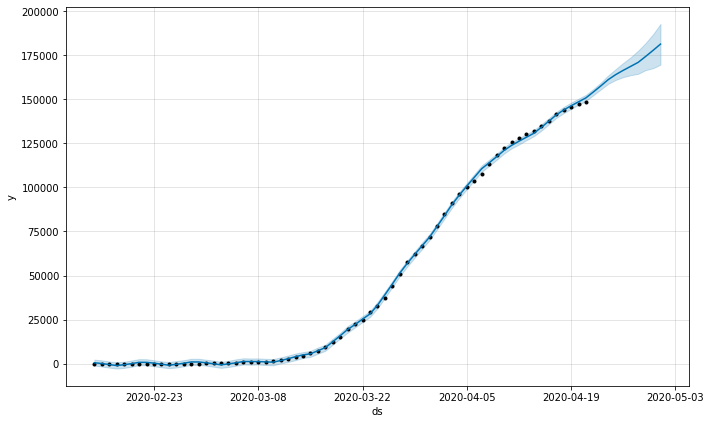

In [0]:
confirmed_forecast_plot = m.plot(forecast_Germany)

In [0]:
forecast_Germany.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-15,-201.934621,-1111.623906,2283.508379,-201.934621,-201.934621,731.925337,731.925337,731.925337,731.925337,731.925337,731.925337,0.0,0.0,0.0,529.990715
1,2020-02-16,-170.914092,-1611.901790,1878.954307,-170.914092,-170.914092,253.038221,253.038221,253.038221,253.038221,253.038221,253.038221,0.0,0.0,0.0,82.124129
2,2020-02-17,-139.893562,-2238.498322,1253.250151,-139.893562,-139.893562,-365.640418,-365.640418,-365.640418,-365.640418,-365.640418,-365.640418,0.0,0.0,0.0,-505.533979
3,2020-02-18,-108.873032,-2774.056257,849.634558,-108.873032,-108.873032,-974.631239,-974.631239,-974.631239,-974.631239,-974.631239,-974.631239,0.0,0.0,0.0,-1083.504271
4,2020-02-19,-77.852502,-2381.065976,1090.878420,-77.852502,-77.852502,-501.831665,-501.831665,-501.831665,-501.831665,-501.831665,-501.831665,0.0,0.0,0.0,-579.684167


Death Data for Germany 

In [0]:
Deaths=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,6,8,9,13,17,26,28,44,68,84,94,123,159,206,267,351,433,541,645,775,931,1107,1275,1444,1584,1810,2016,2349,2607,2736,2871,3022,3194,3495,3804,4052,4352,4538,4642,4862,5086]


In [0]:
df_dth = pd.DataFrame()

In [0]:
df_dth['Date'] = pd.Series(Date)

In [0]:
df_dth['Deaths'] = pd.Series(Deaths)

In [0]:
#df_dth.head()
df_dth.columns = ['ds','y']
df_dth.head()

,ds,y
0,2020-02-15,0
1,2020-02-16,0
2,2020-02-17,0
3,2020-02-18,0
4,2020-02-19,0


In [0]:
m = Prophet(interval_width=0.95)
m.fit(df_dth)
future = m.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast_dth_Germany = m.predict(future)
forecast_dth_Germany[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,6388.020243,6237.309363,6544.316070
73,2020-04-28,6616.140324,6428.455986,6792.789486
74,2020-04-29,6863.373099,6651.806040,7068.675511
75,2020-04-30,7094.712014,6844.872513,7339.137568
76,2020-05-01,7309.089404,7042.279572,7603.967082


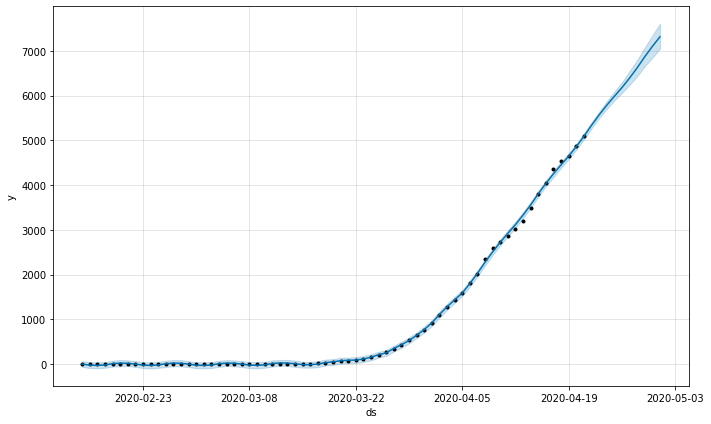

In [0]:
confirmed_forecast_plot = m.plot(forecast_dth_Germany)

In [0]:
#fig = go.Figure()
#Plotting datewise confirmed cases
#fig.add_trace(go.Scatter(x=forecast_Germany['ds'], y=forecast_Germany['yhat'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
#fig.add_trace(go.Scatter(x=forecast_infct_USA['ds'], y=forecast_infct_USA['yhat'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
#fig.update_layout(title='Bangladesh COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
#fig.show()

USA 

In [0]:
USA_Infected=[15,15,15,15,15,15,35,35,35,53,57,60,60,63,68,75,100,124,158,221,319,435,541,704,994,1301,1630,2183,2771,3617,4604,6357,9317,13898,19551,24418,33840,44189,55398,68905,86379,105217,124788,144980,165851,190930,217771,248079,280738,315141,340775,372252,406000,438210,472016,505959,536145,563753,590573,617661,648003,677570,709735,738601,764671,792759,818744]


In [0]:
df_usa_inf = pd.DataFrame()
df_usa_inf['Date'] = pd.Series(Date)
df_usa_inf['Infected'] = pd.Series(USA_Infected)

In [0]:
df_usa_inf.columns = ['ds','y']
df_usa_inf.head()

,ds,y
0,2020-02-15,15
1,2020-02-16,15
2,2020-02-17,15
3,2020-02-18,15
4,2020-02-19,15


In [0]:
m = Prophet(interval_width=0.95)
m.fit(df_usa_inf)
future = m.make_future_dataframe(periods=10)
#future

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_infct_USA = m.predict(future)
forecast_infct_USA[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,1.001551e+06,9.782295e+05,1.026538e+06
73,2020-04-28,1.030140e+06,1.001616e+06,1.060802e+06
74,2020-04-29,1.060749e+06,1.025727e+06,1.097793e+06
75,2020-04-30,1.091381e+06,1.049863e+06,1.135305e+06
76,2020-05-01,1.122009e+06,1.072358e+06,1.175435e+06


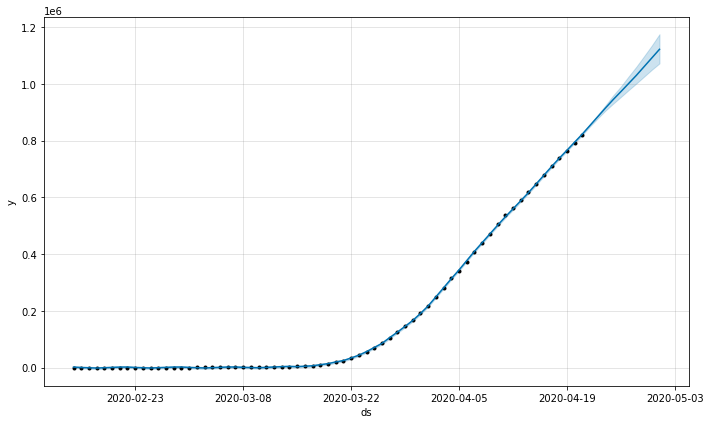

In [0]:
confirmed_forecast_plot = m.plot(forecast_infct_USA)

In [0]:
Death=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,9,11,12,15,19,22,26,30,38,41,48,58,73,95,121,171,239,309,374,509,689,957,1260,1614,2110,2754,3251,3948,5027,6263,7438,8694,10231,11632,13128,15347,17503,19604,21830,23843,25558,27272,29825,32443,34619,37147,39014,40575,42514,45318]

In [0]:
df_usa_dth = pd.DataFrame()
df_usa_dth['Date'] = pd.Series(Date)
df_usa_dth['Death'] = pd.Series(Death)
df_usa_dth.columns = ['ds','y']

In [0]:
df_usa_dth_mdl = Prophet(interval_width=0.95)
df_usa_dth_mdl.fit(df_usa_dth)
future = df_usa_dth_mdl.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_usa_death = df_usa_dth_mdl.predict(future)
forecast_usa_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,57747.750161,56288.289368,59052.207437
73,2020-04-28,60041.645139,58300.928208,61658.043286
74,2020-04-29,62237.688965,60065.106554,64144.868246
75,2020-04-30,64386.713517,61744.063282,66631.215477
76,2020-05-01,66578.328504,63581.988498,69226.548149


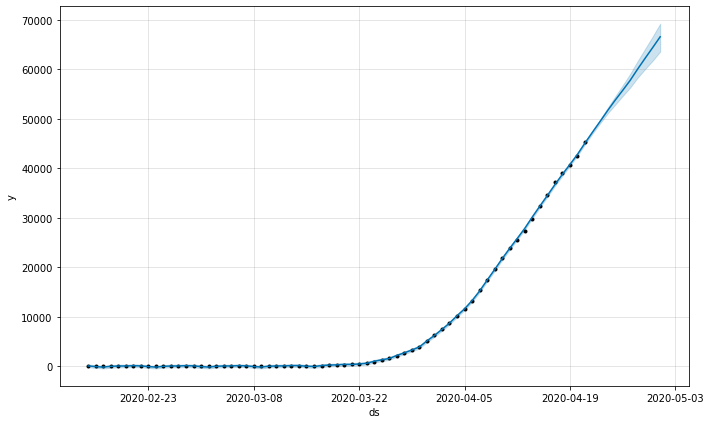

In [0]:
confirmed_forecast_plot = df_usa_dth_mdl.plot(forecast_usa_death)

INDIA

In [0]:
ind_infected=[3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,6,7,29,30,31,34,40,47,62,62,74,82,100,114,129,143,169,194,249,332,396,499,536,657,727,887,987,1024,1251,1397,1998,2543,3059,3588,4289,4778,5351,5916,6725,7600,8446,9205,10453,11487,12370,13430,14352,16365,17615,18539,20080]

In [0]:
df_ind_inf = pd.DataFrame()
df_ind_inf['Date'] = pd.Series(Date)
df_ind_inf['ind_infected'] = pd.Series(ind_infected)
df_ind_inf.columns = ['ds','y']

In [0]:
df_ind_inf_mdl = Prophet(interval_width=0.95)
df_ind_inf_mdl.fit(df_ind_inf)
future = df_ind_inf_mdl.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_ind_inf = df_ind_inf_mdl.predict(future)
forecast_ind_inf[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,25211.709025,24413.405417,26090.361480
73,2020-04-28,26278.888187,25421.793878,27213.034860
74,2020-04-29,27163.162568,26164.520092,28282.856948
75,2020-04-30,28170.083271,26979.888146,29528.385751
76,2020-05-01,29178.626489,27805.431023,30635.584797


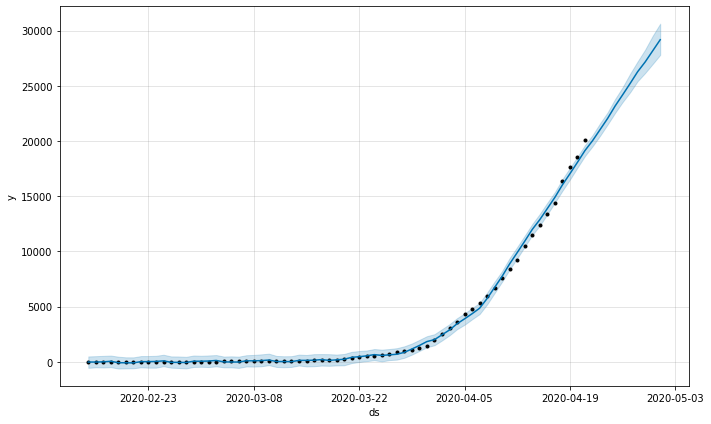

In [0]:
confirmed_forecast_plot = df_ind_inf_mdl.plot(forecast_ind_inf)

In [0]:
Death=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,3,3,4,5,5,7,10,10,12,20,20,24,27,32,35,58,72,86,99,118,136,160,178,227,249,288,331,358,393,422,448,486,521,559,592,645]

In [0]:
df_ind_dth = pd.DataFrame()
df_ind_dth['Date'] = pd.Series(Date)
df_ind_dth['Death'] = pd.Series(Death)
df_ind_dth.columns = ['ds','y']

In [0]:
df_ind_dth_mdl = Prophet(interval_width=0.95)
df_ind_dth_mdl.fit(df_ind_dth)
future = df_ind_dth_mdl.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_ind_dth = df_ind_dth_mdl.predict(future)
forecast_ind_dth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,831.485448,807.325947,856.410340
73,2020-04-28,866.720627,836.950731,894.164831
74,2020-04-29,897.375822,860.468914,931.397474
75,2020-04-30,932.763398,892.669741,973.388721
76,2020-05-01,965.594858,918.696845,1011.873729


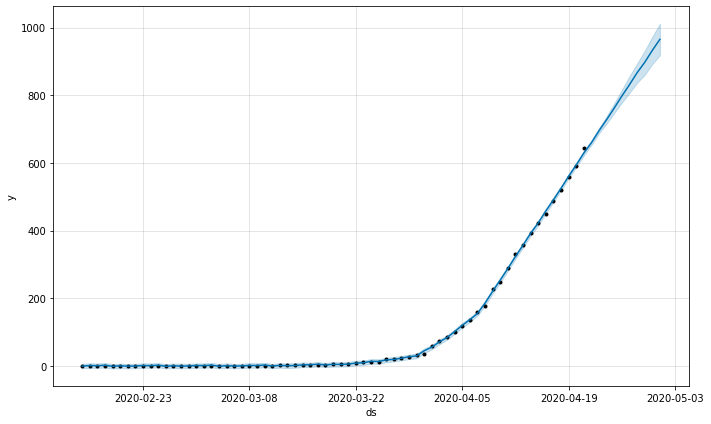

In [0]:
confirmed_forecast_plot = df_ind_dth_mdl.plot(forecast_ind_dth)

Bangladesh

In [0]:
bd_Infected=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,5,5,8,10,14,18,20,24,27,33,39,39,44,48,48,48,49,51,54,56,61,70,88,123,164,218,330,424,482,621,803,1012,1231,1572,1838,2144,2456,2948,3382]

In [0]:
df_bd_inf = pd.DataFrame()
df_bd_inf['Date'] = pd.Series(Date)
df_bd_inf['bd_Infected'] = pd.Series(bd_Infected)
df_bd_inf.columns = ['ds','y']

In [0]:
df_bd_inf_mdl = Prophet(interval_width=0.95)
df_bd_inf_mdl.fit(df_bd_inf)
future = df_bd_inf_mdl.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_bd_inf = df_bd_inf_mdl.predict(future)
forecast_bd_inf[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,1291.556594,261.609031,2382.311775
73,2020-04-28,1361.096663,185.164799,2459.716356
74,2020-04-29,1149.736034,83.267034,2290.916199
75,2020-04-30,1201.439556,125.402095,2295.853694
76,2020-05-01,1242.806262,155.960788,2329.855829


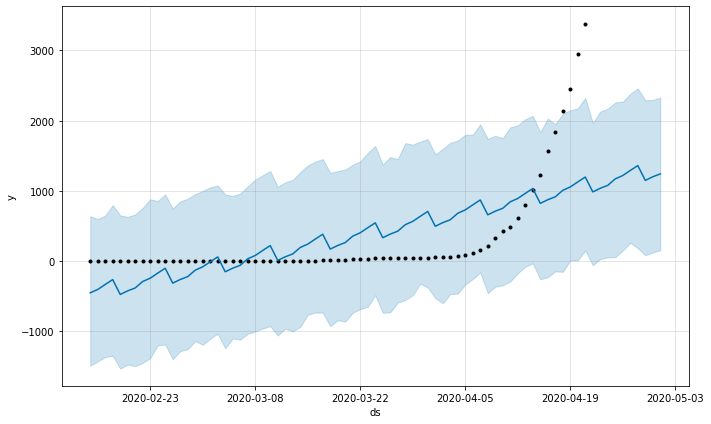

In [0]:
confirmed_forecast_plot = df_bd_inf_mdl.plot(forecast_bd_inf)

In [0]:
Death=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,5,5,5,5,5,5,5,6,6,6,8,9,12,17,20,21,27,30,34,39,46,50,60,75,84,91,101,110]

In [0]:
df_bd_dth = pd.DataFrame()
df_bd_dth['Date'] = pd.Series(Date)
df_bd_dth['Death'] = pd.Series(Death)
df_bd_dth.columns = ['ds','y']

In [0]:
df_bd_dth_mdl = Prophet(interval_width=0.95)
df_bd_dth_mdl.fit(df_bd_dth)
future = df_bd_dth_mdl.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_bd_dth = df_bd_dth_mdl.predict(future)
forecast_bd_dth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-27,135.793915,128.747200,143.192472
73,2020-04-28,142.854304,135.262117,151.219798
74,2020-04-29,147.471406,138.588317,156.142370
75,2020-04-30,153.436623,144.415855,162.676955
76,2020-05-01,160.512767,150.238413,170.730861


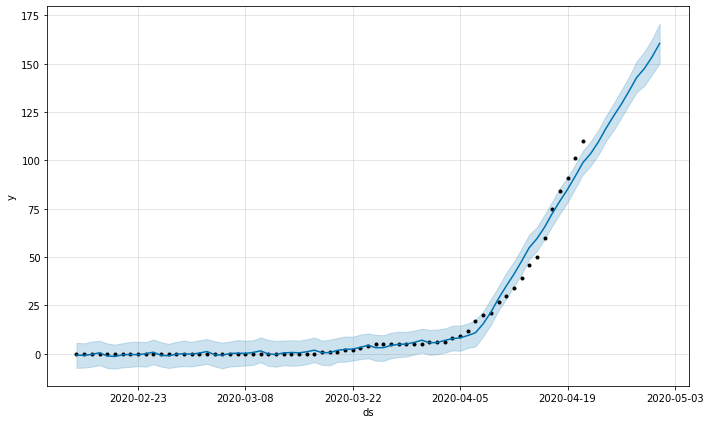

In [0]:
confirmed_forecast_plot = df_bd_dth_mdl.plot(forecast_bd_dth)

In [0]:
#forecast_Germany 
#forecast_infct_USA
#forecast_ind_inf
#forecast_bd_inf df_usa_inf

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=forecast_Germany['ds'], y=forecast_Germany['yhat'], mode='lines+markers', name='Germany_Predicted_Infacted',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines+markers', name='Germany_true_Infacted',line=dict(color='green', width=2)))

fig.add_trace(go.Scatter(x=forecast_infct_USA['ds'], y=forecast_infct_USA['yhat'], mode='lines+markers', name='USA_Predicted_Infacted', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_usa_inf['ds'], y=df_usa_inf['y'], mode='lines+markers', name='USA_True_Infacted', line=dict(color='green', width=2)))


fig.add_trace(go.Scatter(x=forecast_ind_inf['ds'], y=forecast_ind_inf['yhat'], mode='lines+markers', name='INDIA_Predicted_Infacted',line=dict(color='gold', width=2)))
#fig.add_trace(go.Scatter(x=forecast_bd_inf['ds'], y=forecast_bd_inf['yhat'], mode='lines+markers', name='BD_Predicted_Infacted', line=dict(color='black', width=2)))
#fig.add_trace(go.Scatter(x=df_bd_inf['ds'], y=df_bd_inf['y'], mode='lines+markers', name='BD_True_Infacted', line=dict(color='green', width=2)))', width=2)))
fig.add_trace(go.Scatter(x=df_ind_inf['ds'], y=df_ind_inf['y'], mode='lines+markers', name='INDIA_True_Infacted',line=dict(color='green', width=2)))


fig.add_trace(go.Scatter(x=forecast_bd_inf['ds'], y=forecast_bd_inf['yhat'], mode='lines+markers', name='BD_Predicted_Infacted', line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=df_bd_inf['ds'], y=df_bd_inf['y'], mode='lines+markers', name='BD_True_Infacted', line=dict(color='green', width=2)))


#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='World COVID 19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [0]:
#forecast_dth_Germany 
#forecast_usa_death
#forecast_ind_dth
#forecast_bd_dth

#df_dth
#df_usa_dth
#df_ind_dth
#df_bd_dth

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=forecast_dth_Germany['ds'], y=forecast_dth_Germany['yhat'], mode='lines+markers', name='Germany_Predicted_Death',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_dth['ds'], y=df_dth['y'], mode='lines+markers', name='Germany_True_Death',line=dict(color='plum', width=2)))

fig.add_trace(go.Scatter(x=forecast_usa_death['ds'], y=forecast_usa_death['yhat'], mode='lines+markers', name='USA_Predicted_Death', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_usa_dth['ds'], y=df_usa_dth['y'], mode='lines+markers', name='USA_True_Death', line=dict(color='plum', width=2)))

fig.add_trace(go.Scatter(x=forecast_ind_dth['ds'], y=forecast_ind_dth['yhat'], mode='lines+markers', name='INDIA_Predicted_Death',line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=df_ind_dth['ds'], y=df_ind_dth['y'], mode='lines+markers', name='INDIA_True_Death',line=dict(color='plum', width=2)))

fig.add_trace(go.Scatter(x=forecast_bd_dth['ds'], y=forecast_bd_dth['yhat'], mode='lines+markers', name='BD_Death', line=dict(color='black', width=2)))
fig.add_trace(go.Scatter(x=df_bd_dth['ds'], y=df_bd_dth['y'], mode='lines+markers', name='BD_Death', line=dict(color='plum', width=2)))


#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='World COVID-19 Cases Death', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()